In [1]:
%matplotlib notebook  

import numpy as np
from matplotlib import pyplot as plt
import re

## Using single_run

`single_run.py` is a convenience script to pull in the analysis from a single analog, cadis, or cadis-$\Omega$ simulation. There are several inputs arguments that we can use with this convenience function. 

First, the `single_run` object is initialized by providing a path to a simulation directory. This should be the **top** directory of a run. The run object, once `do_single_analysis` is called, will be populated with a number of dicts that contain information (like paths and locations of files) that can be used to generate figures or analysis information 

In [1]:
from single_run import Single_Run
run = Single_Run('/Users/madicken/Documents/pn2_newout/', method_type='cadisangle')
run.do_single_analysis()

INFO -- analysis : initialized cadisangle analysis single_run 
INFO -- analysis.single_run : acquiring files and directories in directory /Users/madicken/Documents/pn2_newout/
INFO -- analysis.utils.get_paths : successfully passed logger to get_paths
INFO -- analysis.utils.get_paths : Base directory found at /Users/madicken/Documents/pn2_newout
INFO -- analysis.utils.get_paths : Found denovo forward solution directory at /Users/madicken/Documents/pn2_newout/fwd_solution
INFO -- analysis.utils.get_paths : Found denovo omega solution directory at /Users/madicken/Documents/pn2_newout/omega_solution
INFO -- analysis.utils.get_paths : Analysis directory and data found at /Users/madicken/Documents/pn2_newout/analysis not creating new directory
INFO -- analysis.utils.get_paths : Found MCNP solution directory at /Users/madicken/Documents/pn2_newout/mcnp
INFO -- analysis.utils.get_paths : Found output solution directory at /Users/madicken/Documents/pn2_newout/output 
INFO -- analysis.utils.get_

For example, you can use tab autocompletion to see the different objects associated with `run`. The figure of merits calculated are:

In [2]:
run.foms

{'fom_max': {'FOM': 0.048141215079468926,
  'relative_error': 0.2485,
  'time': 336.38},
 'fom_max_det': {'FOM': 0.047125037886297398,
  'relative_error': 0.2485,
  'time': 343.6335047094027},
 'fom_mc': {'FOM': 0.10347380718549733,
  'relative_error': 0.16950000000000001,
  'time': 336.38},
 'fom_mc_det': {'FOM': 0.10128965535677928,
  'relative_error': 0.1695,
  'time': 343.6335047094027},
 'fom_min': {'FOM': 146.8063382168462,
  'relative_error': 0.0044999999999999997,
  'time': 336.38},
 'fom_min_det': {'FOM': 143.70751213896833,
  'relative_error': 0.0044999999999999997,
  'time': 343.6335047094027},
 'particle_count': 10000000.0,
 'times_used': {'det_time': 7.2535047094027201,
  'mc_time': 336.38,
  'total_time': 343.6335047094027,
  'units': 'minutes'}}

The file locations are in `run.filenames`. The None type objects are files that were not found by the reader. You can see that the adjoint and forward flux files were not found in this particular example

In [3]:
run.filenames

{'adj_flux_file': None,
 'anisotropy_file': '/Users/madicken/Documents/pn2_newout/omega_solution/problem_anisotropies.h5',
 'fwd_flux_file': None,
 'mcnp_output_file': '/Users/madicken/Documents/pn2_newout/mcnp/out',
 'meshtal_file': '/Users/madicken/Documents/pn2_newout/mcnp/meshtal',
 'omega_flux_file': '/Users/madicken/Documents/pn2_newout/omega_solution/denovo_omega_output.silo',
 'omni_out_file': '/Users/madicken/Documents/pn2_newout/adj_solution/omnibus.pp.json',
 'output_file': '/Users/madicken/Documents/pn2_newout/output/fields.silo',
 'timing_file': '/Users/madicken/Documents/pn2_newout/timing.json',
 'wwinp_file': '/Users/madicken/Documents/pn2_newout/mcnp/wwinp'}

In the next section, **compare_runs**, you will see how these can be linked together to compare the analyses from an analog, a cadis, and a cadis-$\Omega$ simulation. For now, let's see how another script, `analysis.py`, can be used to generate a prettier FOM analysis rather than printing the dictionary. 

In [4]:
from analysis import FOMAnalysis
A = FOMAnalysis(run.filenames['mcnp_output_file'], 44, run.filenames['timing_file'], run.filenames['omni_out_file'])

INFO -- analysis.fomanalysis.calculatefoms : calculating foms for mcnp run
INFO -- analysis.fomanalysis.calculatefoms : calculating modified foms which incorporate
                   deterministic runtime
INFO -- analysis.fomanalysis.timingrame : Constructing
                    timing table with MCNP data from /Users/madicken/Documents/pn2_newout/mcnp/out and timing data from
                    /Users/madicken/Documents/pn2_newout/timing.json. Parallelized times will be multiplied by 4 cores.


A, the object created running `FOMAnalysis` on the mcnp output file, the timing results from omnibus, and the omnibus output file, have several pandas dataframes that have been populated with the necessary information for the analysis that we care about. For example, detailed timing information on each of the runtimes from the hybrid run are contained in the `A.timing_frame` object. Note in the logger that parallelized times are multiplied by the core count. Because this run was performed on 4 cores, all of the denovo times are multiplied by the core count to get the total runtime of denovo. A justification of why this was chosen is in my dissertation 

In [5]:
A.timing_frame

time (minutes)
deterministic time advantg_time        0.181778
                   denovo_time         6.410819
                   dispose_time        0.156977
                   omega_time          0.660908
                   total               7.253505
MCNP time          total             336.380000
wall time          total             343.633505

In addition to the timing information, `fom_frame` contains the Monte Carlo FOMs and the adjusted FOMs that incorporate the denovo and advantg runtimes. 

In [6]:
A.fom_frame

,MC,MC_adjusted
tally avg,0.103474,0.101290
max RE,0.048141,0.047125
min RE,146.806338,143.707512
time (mins),336.380000,343.633505


Let's see what else is associated with the `single_run` analysis script. We initially ran `do_single_analysis` with no arguments. This essentially just populates the different dicts that we just investigated. If we want analysis figures, then we need to add arguments to the `do_single_analysis` function. Using the help function, let's see what arguments are in the function:

In [13]:
help(Single_Run)

Help on class Single_Run in module single_run:

class Single_Run(__builtin__.object)
 |  Methods defined here:
 |  
 |  __init__(self, base_directory_path, method_type='', logfile_name='analysis.log')
 |  
 |  do_single_analysis(self, analysis_directory_name='analysis', group_numbers=[], metrics=[], tally_number='44', plot_boxes_for_metric=False, plot_boxes_for_energy=False, plot_violins_for_metric=False, plot_strip_for_metric=False, plot_strip_for_energy=False, plot_violins_for_energy=False, plot_FoM_convergence=False, plot_RE_by_bin=False, plot_tally_results=False, save_FoM_data=False, save_tally_data=False, plot_anisotropy_with_tallydata=False, plot_anisotropies_median=False, plot_anisotropies_mean=False, save_data_json=False, select_anisotropies='full')
 |      This is the driver script to generate analysis data for a single run.
 |      The user can choose whether to overwrite previous data, which metrics to
 |      plot, and where to save that data. By default it will be saved in

The **boxes**, **violins**, and **strip** plots are different categorical figures that are used to plot problem anisotropies. The MCNP results are done with **plot_RE_by_bin** and **plot_tally_results**. the **for_energy** and **for_metric** options for the categorical plots select out data for a particular energy group or for a particular aniotropy metric. These images automatically save to an *analysis* directory that is created within the run folder. To see what they look like, I'll pull the plotting functions out and manually plot them here. 

In [14]:
from analysis import MCNPOutput
from plotting_utils import energy_histogram

In [16]:
M = MCNPOutput(run.filenames['mcnp_output_file'])
mcnpdata=M.get_tally_data()

In [18]:
err = mcnpdata['tally_data']['relative_error']
result = mcnpdata['tally_data']['tallied_result']
groups = mcnpdata['tally_data']['energy_groups']
savedir1 = run.directories['analysis_directory']+'/mcnp_RE.png'
savedir2 = run.directories['analysis_directory']+'/mcnp_result.png'

In [26]:
%matplotlib inline

WARNING -- analysis.plotting_utils.energy_hist : energy groups not binned. using 1e-10 as lowest bound


<module 'matplotlib.pyplot' from '/opt/local/Library/Frameworks/Python.framework/Versions/2.7/lib/python2.7/site-packages/matplotlib/pyplot.pyc'>

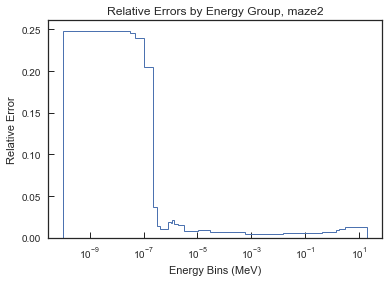

In [27]:
energy_histogram(groups,err, plot_title='Relative Errors by Energy Group, maze2', y_title='Relative Error', savepath=None)

WARNING -- analysis.plotting_utils.energy_hist : energy groups not binned. using 1e-10 as lowest bound


<module 'matplotlib.pyplot' from '/opt/local/Library/Frameworks/Python.framework/Versions/2.7/lib/python2.7/site-packages/matplotlib/pyplot.pyc'>

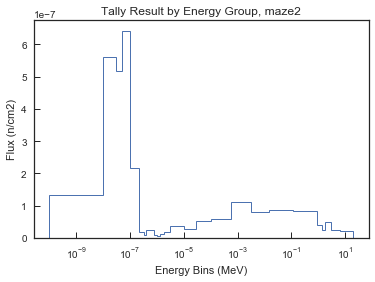

In [29]:
energy_histogram(groups,result, plot_title='Tally Result by Energy Group, maze2', y_title='Flux (n/cm2)', savepath=None)

Both of these figures are plotted automatically if you instead choose:

In [30]:
run.do_single_analysis(plot_RE_by_bin=True, plot_tally_results=True)

INFO -- analysis.single_run : acquiring files and directories in directory /Users/madicken/Documents/pn2_newout/
INFO -- analysis.utils.get_paths : successfully passed logger to get_paths
INFO -- analysis.utils.get_paths : Base directory found at /Users/madicken/Documents/pn2_newout
INFO -- analysis.utils.get_paths : Found denovo forward solution directory at /Users/madicken/Documents/pn2_newout/fwd_solution
INFO -- analysis.utils.get_paths : Found denovo omega solution directory at /Users/madicken/Documents/pn2_newout/omega_solution
INFO -- analysis.utils.get_paths : Analysis directory and data found at /Users/madicken/Documents/pn2_newout/analysis not creating new directory
INFO -- analysis.utils.get_paths : Found MCNP solution directory at /Users/madicken/Documents/pn2_newout/mcnp
INFO -- analysis.utils.get_paths : Found output solution directory at /Users/madicken/Documents/pn2_newout/output 
INFO -- analysis.utils.get_paths : Timing file found at /Users/madicken/Documents/pn2_newo

The logger shows where these are saved on the machine. We can open them and compare: 

In [35]:
from IPython.display import IFrame
# IFrame("./samples/simple3.pdf", width=600, height=300)
IFrame('/Users/madicken/Documents/pn2_newout/analysis/tally_44_error.pdf', width=600, height=600)

## Using compare_runs

## Using mcnpoutput tools

In [ ]:
from mcnpoutput import TrackLengthTally

First let's initialize the TrackLengthTally method object with the relevant information. I'll use a sample dataset on my local machine. 

In [2]:
therapy_output = TrackLengthTally("/Users/madicken/Documents/wwdebug/out", 44)

Next I'll use each function associated with the method. Each function populates a dictionary with relevant information for the tally specified in the tally init function. 

In [3]:
therapy_time = therapy_output.get_timing_data()
therapy_fom = therapy_output.get_fom_data()
therapy_tally = therapy_output.get_tally_result()

Now let's make sure each of the dictionaries were populated with what we expect. Notice that both therapy_tally and therapy_fom are keyed with numpy arrays, while therapy_time is keyed with subdictionaries. 

In [6]:
print(therapy_time.keys(), therapy_time.values())
print(therapy_fom.keys())
print(therapy_tally.keys())

(['total_time', 'mcrun_time'], [{'units': 'minutes', 'time': 6.84}, {'units': 'minutes', 'time': 0.95}])
['slope', 'vov', 'error', 'fom', 'nps', 'mean']
['tallied_result', 'tally_total_relative_error', 'relative_error', 'energy_groups', 'tallied_total']


Last, let's make sure that the tallied result and the relative error were populated with the data that we expect. These should be numpy arrays. 

In [17]:
print(therapy_tally["tallied_result"]) 
      
print(therapy_tally["relative_error"])

[  1.17274000e-10   5.82163000e-10   6.33716000e-10   1.29494000e-09
   6.70163000e-10   1.37736000e-10   9.64432000e-11   1.88552000e-10
   2.37415000e-10   3.04835000e-11   4.23573000e-11   6.53810000e-11
   1.56023000e-10   5.44237000e-10   2.48705000e-10   2.14784000e-10
   3.89789000e-10   5.93136000e-10   2.60373000e-10   1.00633000e-09
   1.10004000e-09   1.11410000e-09   5.24200000e-10   3.47218000e-10
   5.39201000e-10   4.16620000e-10   2.76038000e-10]
[ 0.2239  0.1217  0.1044  0.1026  0.1632  0.2398  0.3294  0.3473  0.6586
  0.3183  0.3214  0.2156  0.2522  0.482   0.2253  0.2159  0.1589  0.3903
  0.1787  0.208   0.2367  0.1693  0.1729  0.2963  0.1871  0.3436  0.3894]


In [18]:
print(np.sum(therapy_tally['tallied_result']))
print(therapy_tally['tallied_total'])

1.1827418e-08
1.18274e-08
